### list comprehension을 사용하는 것이 코드가 간결하나 이 실습에서는 dictionary를 사용한다


stock_dict = [
    ['삼성전자', '005930'],
    ['SK하이닉스', '00660'],
    ['현대차', '005380'],
    ['셀트리온', '068270'],
    ['LG화학', '051910'],
    ['POSCO', '005490'],
    ['삼성물산', '028260'],
    ['NAVER', '035420']
]

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import FinanceDataReader as fdr

# oread_csv문자./krx.csv의미한다
# Symbol같은 경우 앞에 0이 들어가 있기 때문에 숫자로 변환되면서 0이 누락되는 것을 방지하기 위함
df = pd.read_csv('krx.csv', dtype={'Symbol':object})
df.shape


def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 ' Linux'로 확인
    
    if system_name == 'Darwin':
        font_family = 'AppleGothic'
    elif system_name == 'Windows':
        font_family = 'Malgun Gothic'
    else:
        # Linux
        # colab에서는 runtime을 <꼭> 재시작 해야 한다.
        # 런타임을 재시작 하지 않고 폰트 설치를 하면 기본 설정 폰트가 로드되어 한글이 깨짐
        !apt-get update -qq
        !apt-get install fonts-nanum -qq > /dev/null
        
        import matplotlib.font_manager as fm
        
        fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
        font = fm.FontProperties(fname=fontpath, size=9)
        fm._rebuild()
        font_family = 'NanumBarunGothic'
    return font_family

font_family = get_font_family()
# 폰트설정
plt.rc('font', family=font_family)
# 마이너스 폰트 설정
plt.rc('axes', unicode_minus=False)
# 그래프 스타일 설정
plt.style.use('dark_background')

In [3]:
stock_dict = {
    '삼성전자': '005930',
    'SK하이닉스': '000660',
    '현대차': '005380',
    '셀트리온': '068270',
    'LG화학': '051910',
    'POSCO': '005490',
    '삼성물산': '028260',
    'NAVER': '035420'
}
stock_dict

{'삼성전자': '005930',
 'SK하이닉스': '000660',
 '현대차': '005380',
 '셀트리온': '068270',
 'LG화학': '051910',
 'POSCO': '005490',
 '삼성물산': '028260',
 'NAVER': '035420'}

In [17]:
stock_dict.values()

dict_values(['005930', '000660', '005380', '068270', '051910', '005490', '028260', '035420'])

In [4]:
item_list = []
for item_code in stock_dict.values():
    close = fdr.DataReader(item_code, '2020', '2021')['Close']
    item_list.append(close)

In [19]:
item_list

[Date
 2020-01-02    55200
 2020-01-03    55500
 2020-01-06    55500
 2020-01-07    55800
 2020-01-08    56800
               ...  
 2020-12-23    73900
 2020-12-24    77800
 2020-12-28    78700
 2020-12-29    78300
 2020-12-30    81000
 Name: Close, Length: 248, dtype: int64,
 Date
 2020-01-02     94700
 2020-01-03     94500
 2020-01-06     94300
 2020-01-07     94000
 2020-01-08     97400
                ...  
 2020-12-23    116000
 2020-12-24    118000
 2020-12-28    115500
 2020-12-29    116000
 2020-12-30    118500
 Name: Close, Length: 248, dtype: int64,
 Date
 2020-01-02    118000
 2020-01-03    116000
 2020-01-06    116000
 2020-01-07    115500
 2020-01-08    112000
                ...  
 2020-12-23    185000
 2020-12-24    187000
 2020-12-28    189500
 2020-12-29    190500
 2020-12-30    192000
 Name: Close, Length: 248, dtype: int64,
 Date
 2020-01-02    176761
 2020-01-03    174306
 2020-01-06    169887
 2020-01-07    174797
 2020-01-08    169887
                ...  
 2020-

<AxesSubplot:xlabel='Date'>

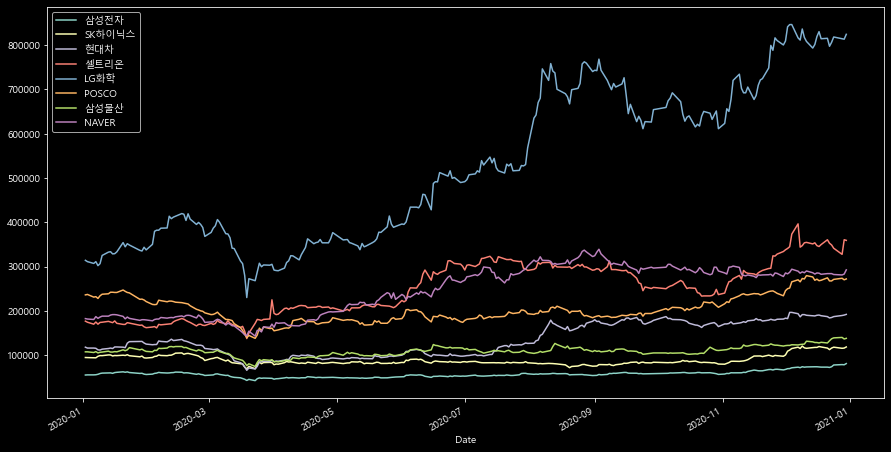

In [6]:
df = pd.concat(item_list, axis=1)
df.columns = stock_dict.keys()
df.plot(figsize=(15,8))

<AxesSubplot:xlabel='Date'>

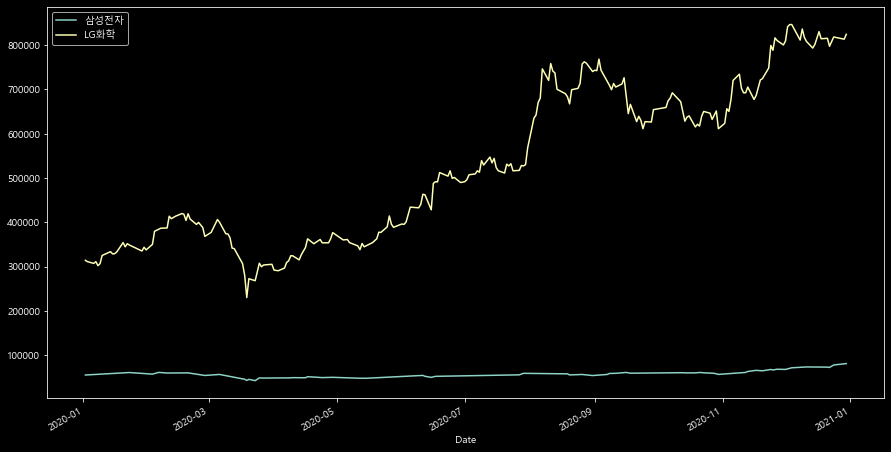

In [40]:
df[['삼성전자', 'LG화학']].plot(figsize=(15,8))

<AxesSubplot:xlabel='Date'>

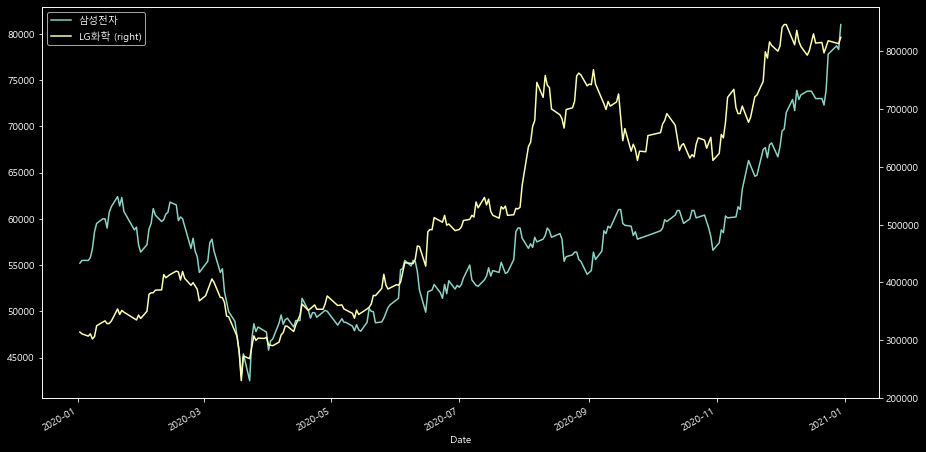

In [41]:
df[['삼성전자', 'LG화학']].plot(secondary_y='LG화학', figsize=(15,8))

####  표준화 : 데이터가 평균으로부터 얼마나 떨어져 있는지
####  정규화 : 데이터의 상대적 크키에 대한 영향을 줄이기 위해 0 ~ 1로 변환

In [44]:
df2 = df[['LG화학', '삼성전자']]
# 첫날을 기준으로 각 날짜별 값을 나눠준다
# 첫날을 1로 봤을때에 대한 수치
df2 / df2.iloc[0]

,LG화학,삼성전자
Date,,
2020-01-02,1.000000,1.000000
2020-01-03,0.990446,1.005435
2020-01-06,0.977707,1.005435
2020-01-07,0.990446,1.010870
2020-01-08,0.961783,1.028986
...,...,...
2020-12-23,2.566879,1.338768
2020-12-24,2.605096,1.409420
2020-12-28,2.592357,1.425725


In [46]:
# 첫날을 기준으로 수익률
df_plot = df2 / df2.iloc[0] - 1
df_plot

,LG화학,삼성전자
Date,,
2020-01-02,0.000000,0.000000
2020-01-03,-0.009554,0.005435
2020-01-06,-0.022293,0.005435
2020-01-07,-0.009554,0.010870
2020-01-08,-0.038217,0.028986
...,...,...
2020-12-23,1.566879,0.338768
2020-12-24,1.605096,0.409420
2020-12-28,1.592357,0.425725


<AxesSubplot:xlabel='Date'>

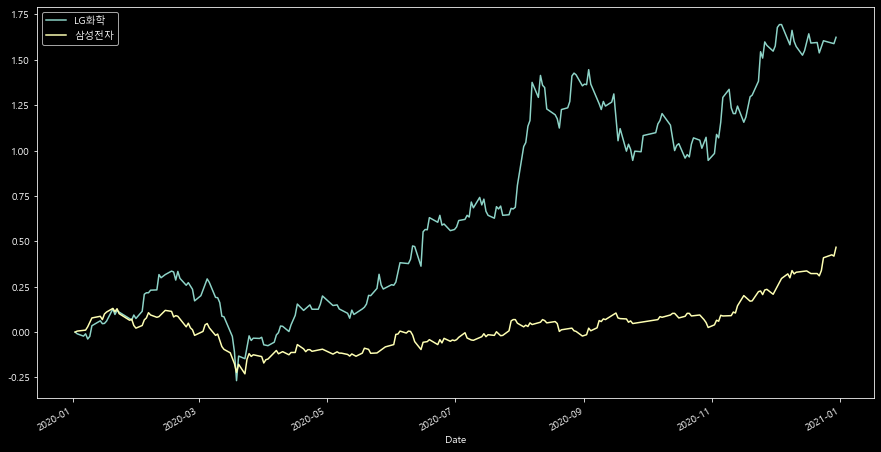

In [48]:
df_plot.plot(figsize=(15,8))

<AxesSubplot:title={'center':'수익률 그래프'}, xlabel='Date'>

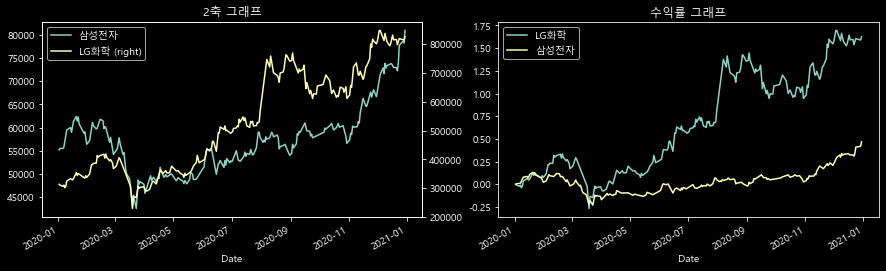

In [55]:
# 밑바탕
fig, axis = plt.subplots(1,2, figsize=(15,4))

# ax를 지정하지 않으면 밑에 그려진다
df[['삼성전자', 'LG화학']].plot(secondary_y='LG화학', ax=axis[0], title='2축 그래프')
df_plot.plot(ax=axis[1], title='수익률 그래프')

In [7]:
df_norm = df / df.iloc[0] -1
df_norm

,삼성전자,SK하이닉스,현대차,셀트리온,LG화학,POSCO,삼성물산,NAVER
Date,,,,,,,,
2020-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-03,0.005435,-0.002112,-0.016949,-0.013889,-0.009554,0.004237,0.000000,-0.005479
2020-01-06,0.005435,-0.004224,-0.016949,-0.038889,-0.022293,-0.021186,-0.013953,-0.010959
2020-01-07,0.010870,-0.007392,-0.021186,-0.011111,-0.009554,-0.016949,0.004651,0.024658
2020-01-08,0.028986,0.028511,-0.050847,-0.038889,-0.038217,-0.033898,-0.023256,0.002740
...,...,...,...,...,...,...,...,...
2020-12-23,0.338768,0.224921,0.567797,0.972228,1.566879,0.133475,0.274419,0.556164
2020-12-24,0.409420,0.246040,0.584746,0.930562,1.605096,0.148305,0.293023,0.545205
2020-12-28,0.425725,0.219641,0.605932,0.852784,1.592357,0.158898,0.302326,0.539726


<AxesSubplot:xlabel='Date'>

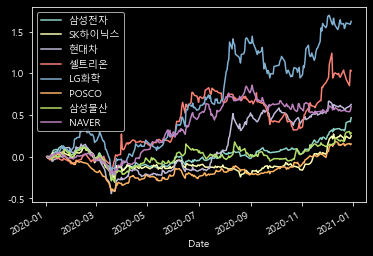

In [8]:
df_norm.plot()

In [9]:
df_norm.describe()

,삼성전자,SK하이닉스,현대차,셀트리온,LG화학,POSCO,삼성물산,NAVER
count,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000
mean,0.035385,-0.061919,0.138853,0.413480,0.678992,-0.138959,0.017393,0.348862
std,0.127932,0.115102,0.314121,0.345341,0.559427,0.128907,0.103888,0.301454
min,-0.230072,-0.271383,-0.441525,-0.222221,-0.267516,-0.415254,-0.306977,-0.216438
25%,-0.052989,-0.134108,-0.155932,0.087500,0.149682,-0.225106,-0.032558,0.021918
50%,0.028986,-0.109293,0.052966,0.431948,0.617834,-0.169492,0.013953,0.479452
75%,0.088768,0.005808,0.461864,0.692363,1.190287,-0.062500,0.080233,0.600000
max,0.467391,0.272439,0.665254,1.241671,1.694268,0.184322,0.302326,0.857534


In [10]:
df_norm.skew()

삼성전자      0.860397
SK하이닉스    1.229166
현대차       0.174059
셀트리온      0.046508
LG화학      0.244831
POSCO     0.601748
삼성물산     -0.175907
NAVER    -0.271592
dtype: float64

In [11]:
df_norm.kurt()

삼성전자      0.940228
SK하이닉스    0.951988
현대차      -1.502115
셀트리온     -1.242026
LG화학     -1.375776
POSCO    -0.115173
삼성물산      0.680725
NAVER    -1.448779
dtype: float64